2000000


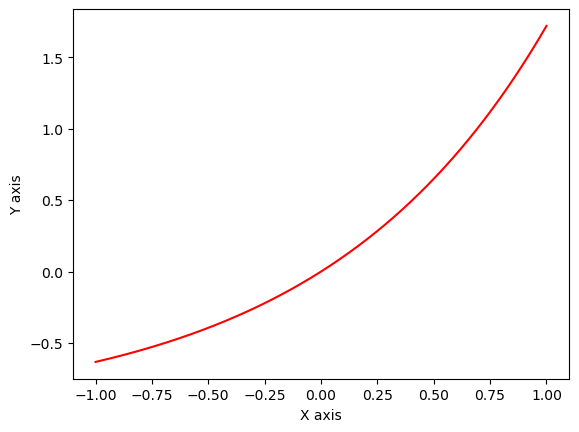

<Figure size 640x480 with 0 Axes>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    y = math.e ** x
    return y - 1


x = np.arange(-1, 1, 0.000001)
print(len(x))
 
# plotting
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, f(x), color ="red")
plt.show()

plt.savefig("figure.png")

In [9]:

test = 9.99999999500000e-10
print(f(test))

1.000000082740371e-09


In [40]:

f1 = lambda x:x+((x**2)/2)+((x**3)/6)+((x**4)/24)+((x**5)/120)+((x**6)/720)+((x**6)/720)
print(f1(test))


1e-09



 Bisection method with nmax=100 and tol=1.0e-08


|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|
|--0--|0.8000|0.9000|0.85000000|0.10000000|0.05128041|
|--1--|0.8500|0.9000|0.87500000|0.05000000|0.01754350|
|--2--|0.8750|0.9000|0.88750000|0.02500000|0.00049579|
|--3--|0.8875|0.9000|0.89375000|0.01250000|0.00807343|
|--4--|0.8875|0.8938|0.89062500|0.00625000|0.00378502|
|--5--|0.8875|0.8906|0.88906250|0.00312500|0.00164367|
|--6--|0.8875|0.8891|0.88828125|0.00156250|0.00057370|
|--7--|0.8875|0.8883|0.88789062|0.00078125|0.00003890|
|--8--|0.8875|0.8879|0.88769531|0.00039062|0.00022846|
|--9--|0.8877|0.8879|0.88779297|0.00019531|0.00009479|
|--10--|0.8878|0.8879|0.88784180|0.00009766|0.00002795|
|--11--|0.8878|0.8879|0.88786621|0.00004883|0.00000547|
|--12--|0.8878|0.8879|0.88785400|0.00002441|0.00001124|
|--13--|0.8879|0.8879|0.88786011|0.00001221|0.00000288|
|--14--|0.8879|0.8879|0.88786316|0.00000610|0.00000130|
|--15--|0.8879|0.8879|0.88786163|0.00000305|0.00000079|
|--16

(0.8878622114658355,
 array([0.85      , 0.875     , 0.8875    , 0.89375   , 0.890625  ,
        0.8890625 , 0.88828125, 0.88789062, 0.88769531, 0.88779297,
        0.8878418 , 0.88786621, 0.887854  , 0.88786011, 0.88786316,
        0.88786163, 0.8878624 , 0.88786201, 0.88786221, 0.8878623 ,
        0.88786225, 0.88786223, 0.88786222, 0.88786221]))

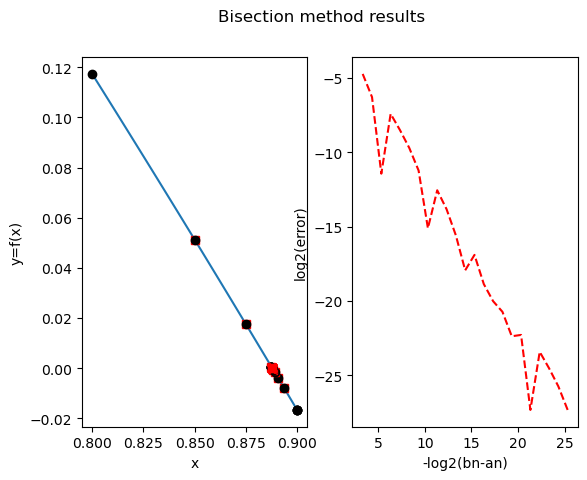

In [41]:
import numpy as np;
import matplotlib.pyplot as plt;

def bisect_method(f,a,b,tol,nmax,vrb=False):
    #Bisection method applied to f between a and b

    # Initial values for interval [an,bn], midpoint xn
    an = a; bn=b; n=0;
    xn = (an+bn)/2;
    # Current guess is stored at rn[n]
    rn=np.array([xn]);
    r=xn;
    ier=0;

    if vrb:
        print("\n Bisection method with nmax=%d and tol=%1.1e\n" % (nmax, tol));

    # The code cannot work if f(a) and f(b) have the same sign.
    # In this case, the code displays an error message, outputs empty answers and exits.
    if f(a)*f(b)>=0:
        print("\n Interval is inadequate, f(a)*f(b)>=0. Try again \n")
        print("f(a)*f(b) = %1.1f \n" % f(a)*f(b));
        r = None;
        return r
    else:
        #If f(a)f(b), we proceed with the method.
        if vrb:
            print("\n|--n--|--an--|--bn--|----xn----|-|bn-an|--|---|f(xn)|---|");

            # We start two plots as subplots in the same figure.
            fig, (ax1, ax2) = plt.subplots(1, 2); #Creates figure fig and subplots
            fig.suptitle('Bisection method results'); #Sets title of the figure
            ax1.set(xlabel='x',ylabel='y=f(x)'); #Sets labels for axis for subplot 1
            # We plot y=f(x) on the left subplot.
            xl=np.linspace(a,b,100,endpoint=True); yl=f(xl);
            ax1.plot(xl,yl);

        while n<=nmax:
            if vrb:
                print("|--%d--|%1.4f|%1.4f|%1.8f|%1.8f|%1.8f|" % (n,an,bn,xn,bn-an,np.abs(f(xn))));

                ################################################################
                # Plot results of bisection on subplot 1 of 2 (horizontal).
                xint = np.array([an,bn]);
                yint=f(xint);
                ax1.plot(xint,yint,'ko',xn,f(xn),'rs');
                ################################################################

            # Bisection method step: test subintervals [an,xn] and [xn,bn]
            # If the estimate for the error (root-xn) is less than tol, exit
            if (bn-an)<2*tol: # better test than np.abs(f(xn))<tol
                ier=1;
                break;

            # If f(an)*f(xn)<0, pick left interval, update bn
            if f(an)*f(xn)<0:
                bn=xn;
            else:
                #else, pick right interval, update an
                an=xn;

            # update midpoint xn, increase n.
            n += 1;
            xn = (an+bn)/2;
            rn = np.append(rn,xn);

    # Set root estimate to xn.
    r=xn;

    if vrb:
        ########################################################################
        # subplot 2: approximate error log-log plot
        e = np.abs(r-rn[0:n]);
        #length of interval
        ln = (b-a)*np.exp2(-np.arange(0,e.size));
        #log-log plot error vs interval length
        ax2.plot(-np.log2(ln),np.log2(e),'r--');
        ax2.set(xlabel='-log2(bn-an)',ylabel='log2(error)');
        ########################################################################

    return r, rn;\

#variable defs
f = lambda x : np.sin(x) - 2*x + 1

#test case one
a = 0.8
b = 0.9
bisect_method(f,a,b,1e-8,100,True)
